## NREL WAVE data Alaska 

This notebook demonstrates basic usage of the National Renewable Energy Laboratory (NREL) Wave data. More complete examples can be found here: https://github.com/NREL/hsds-examples. 


In [1]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
h5pyd.version.version  # should be >= 0.4.2

'0.8.4'

In [3]:
! hsinfo

server name: NREL prod HSDS server
server state: READY
endpoint: https://developer.nrel.gov/api/hsds
username: api_gateway 
password: ****
server version: 0.7.0beta
node count: 8
up: 29 days, 3 hours 31 min 44 sec
h5pyd version: 0.8.4


In [4]:
# In the shell, use the --bucket option to list files from NREL's S3 bucket 
!  hsls --bucket nrel-pds-hsds -H -v /nrel/US_wave/Alaska/

nrel_admin                                          folder   2021-07-22 19:01:28 /nrel/US_wave/Alaska/
nrel_admin                             30.5M        domain   2021-10-28 18:33:57 /nrel/US_wave/Alaska/Alaska_wave_1979.h5
nrel_admin                            455.2G        domain   2021-07-30 19:09:34 /nrel/US_wave/Alaska/Alaska_wave_1980.h5
nrel_admin                            455.2G        domain   2021-07-30 19:10:24 /nrel/US_wave/Alaska/Alaska_wave_1981.h5
nrel_admin                            455.2G        domain   2021-07-30 19:10:24 /nrel/US_wave/Alaska/Alaska_wave_1982.h5
nrel_admin                            455.2G        domain   2021-07-30 19:11:25 /nrel/US_wave/Alaska/Alaska_wave_1983.h5
nrel_admin                            455.2G        domain   2022-03-30 14:26:55 /nrel/US_wave/Alaska/Alaska_wave_1984.h5
nrel_admin                            455.2G        domain   2021-07-30 19:15:26 /nrel/US_wave/Alaska/Alaska_wave_1985.h5
nrel_admin                            455.2

In [5]:
# Open the wind data "file". Use the bucket param to get data from NREL's S3 bucket
%time f = h5pyd.File("/nrel/US_wave/Alaska/Alaska_wave_1991.h5", 'r', bucket="nrel-pds-hsds")  

CPU times: user 10.2 ms, sys: 5.19 ms, total: 15.4 ms
Wall time: 636 ms


In [6]:
# attributes can be used to provide desriptions of the content
for k in f.attrs:
    print(f"{k}: {f.attrs[k]}") 

ref_IEC62600-101: International Electrotechnical Commission, Marine energy - Wave, tidal and other water current converters - Part 101: Wave energy resource assessment and characterization, Technical Specification 62600–101, 2015.
ref_SWAN-Manual: SWAN Team, SWAN: User Manual, Delft University of Technology, Delft, The Netherlands, Cycle III Version 41.31, 2019.
ref_Wu-Wang-Yang-Garcia-Medina-2020: W.C. Wu, T. Wang, Z. Yang, and G. García-Medina, “Development and validation of a high-resolution regional wave hindcast model for U.S. West Coast wave resource characterization,” Renewable Energy, vol. 152, pp. 736–753, Jun. 2020.
source: PNNL2019
version: v1.0.0


In [7]:
list(f)  # list the datasets in the file

['coordinates',
 'directionality_coefficient',
 'energy_period',
 'maximum_energy_direction',
 'mean_absolute_period',
 'mean_wave_direction',
 'mean_zero-crossing_period',
 'meta',
 'omni-directional_wave_power',
 'peak_period',
 'significant_wave_height',
 'spectral_width',
 'time_index']

In [8]:
# get the windspeed at 80 meters
dset = f['significant_wave_height']

In [9]:
dset.id.id  # each object is identified with a guid

'd-267e9824-ff880e99-0bfb-dcdf28-c3d9a0'

In [10]:
dset.shape  # shape is three-dimensional  time x lat x lon

(2920, 3894283)

In [11]:
dset.dtype  # type is four byte floats

dtype('float32')

In [12]:
# chunks describe how the dataset data is stored
# 'H5D_CHUNKED_REF_INDIRECT' is used to reference chunks stored in an external HDF5 file
dset.chunks  

{'class': 'H5D_CHUNKED_REF_INDIRECT',
 'file_uri': 's3://wpto-pds-us-wave/v1.0.0/Alaska/Alaska_wave_1991.h5',
 'dims': [448, 1116],
 'chunk_table': 'd-267e9824-ff880e99-4c30-74ccea-aa61a7'}

In [13]:
dset.shape[0] * dset.shape[1] * 4  # ~40 GB per dataset

45485225440

In [14]:
# read one slice of the data
%time tseries = dset[::,12345]

CPU times: user 4.27 ms, sys: 0 ns, total: 4.27 ms
Wall time: 2.12 s


In [15]:
len(tseries)    

2920

In [16]:
tseries.min(), tseries.max(), tseries.mean()

(0.25215, 7.39395, 1.8990469)

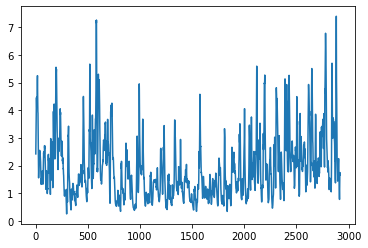

In [17]:
x = range(len(tseries))
plt.plot(x, tseries)